In [18]:
# importing libraries
import numpy as np # for linear algebra
import pandas as pd # data preprocessing

import tensorflow as tf # deep learning
from tensorflow.keras import layers, models # working on layers
import matplotlib.pyplot as plt # data visualization

In [19]:
# setting image_size and batch_size
IMAGE_SIZE = 256
BATCH_SIZE = 32


In [20]:
# importing dataset directory 
df = tf.keras.preprocessing.image_dataset_from_directory("PlantVillage",shuffle=True,image_size= (IMAGE_SIZE,IMAGE_SIZE),
                                                        batch_size= BATCH_SIZE)


Found 2152 files belonging to 3 classes.


In [21]:
# getting class names
class_names = df.class_names
class_names


['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [22]:
# len of dataset ( Total number of files/ batch size)
len(df)


68

In [23]:
print(df) 

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


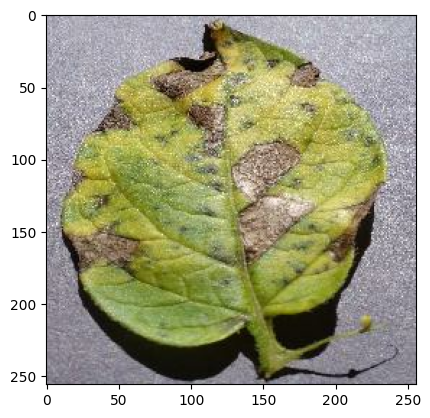

In [24]:
# viewing image 
for image_batch, label_batch in df.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    
    # plt.axis("off") : used to view image without axis points
# refreshing every time gives another picture and label as given

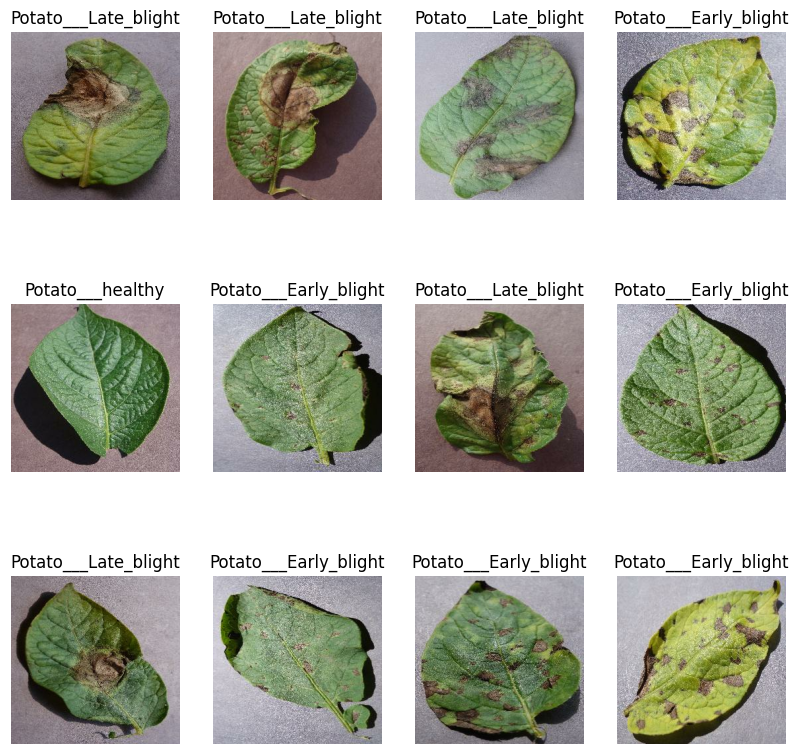

In [25]:
# images with the labels
plt.figure(figsize=(10,10))
for image_batch, label_batch in df.take(1):
    for i in range(12):
        plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis('off')
        

In [26]:
# channels (RGB[Red, Green, Blue]), Epochs = 50
CHANNELS = 3
EPOCHS = 50

In [27]:
# checking the length of training data
train_size = 0.8
len(df) * train_size

54.400000000000006

In [28]:
# length of validation and test data
val_n_test = len(df) - (len(df) * train_size)
val_n_test

13.599999999999994

In [29]:
# splitting the data into training , validation and testing data

def split_datasets(pc,train_split = 0.8,val_split = 0.1, test_split = 0.1, shuffle = True, shuffle_size = 10000):
    if shuffle:
        pc = pc.shuffle(shuffle_size,seed = 10)
        
    pc_size = len(pc) # size of potato_data(68)
    train_size = int(train_split*pc_size)
    val_size = int(val_split*pc_size)
    
    train_pc = pc.take(train_size) # taking first 54 batches(out of 68)
    val_pc = pc.skip(train_size).take(val_size) # leaving first 54 and taking next 6 batches
    test_pc = pc.skip(train_size).skip(val_size) # skipping first 54(train) batch and 6(validation) batch and 
                                                 #taking left 8 batches for test
    
    return train_pc, val_pc, test_pc

In [30]:
# getting the training, validation and testing data by 'split_datasets' function
train_data, val_data, test_data = split_datasets(df)

In [31]:
# printing the size of all data splits
print("Size of Data is :{0} \nBatch Size of Training Data is :{1} \nBatch Size of Validation Data :{2} \nBatch Size of Test Data :{3}"
      .format(len(df), len(train_data), len(val_data), len(test_data)))

Size of Data is :68 
Batch Size of Training Data is :54 
Batch Size of Validation Data :6 
Batch Size of Test Data :8


In [32]:
# caching, shuffling and prefetching the data
train_pc = train_data.cache().shuffle(100).prefetch(buffer_size=tf.data.AUTOTUNE)
val_pc = val_data.cache().shuffle(100).prefetch(buffer_size=tf.data.AUTOTUNE)
test_pc = test_data.cache().shuffle(100).prefetch(buffer_size=tf.data.AUTOTUNE)

In [36]:
# Image Preprocessing : Rescaling and Resizing
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1./255),
])

# Data Augmentation by flipping and rotating existing images
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip(mode ='horizontal_and_vertical'),
    layers.RandomRotation(factor=0.5)
])

In [40]:
from tensorflow.keras import layers, models, Input

# Define input shape for the model
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)

# Build the model
model = models.Sequential([
    Input(shape=(IMAGE_SIZE, IMAGE_SIZE, CHANNELS)),  # Use Input layer instead of input_shape in Conv2D
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu'),
    layers.MaxPool2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPool2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPool2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPool2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPool2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPool2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='softmax')
])




In [41]:
# model_summary
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_6 (Sequential)            │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_7 (Sequential)            │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 125, 125, 64)        │           9,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 28, 28, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 4, 4, 64)            │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 2, 2, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 64)                  │           8,256 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 346,176 (1.32 MB)

 Trainable params: 346,176 (1.32 MB)

 Non-trainable params: 0 (0.00 B)

In [42]:
# optimizing the model
model.compile(optimizer='adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
             metrics=['accuracy'])

In [43]:
# fitting the model
history = model.fit(train_data, epochs = EPOCHS, batch_size=BATCH_SIZE, validation_data=val_data, verbose=1)

Epoch 1/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 222s 4s/step - accuracy: 0.3933 - loss: 2.0192 - val_accuracy: 0.4427 - val_loss: 0.9266
Epoch 2/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 219s 3s/step - accuracy: 0.4820 - loss: 0.8870 - val_accuracy: 0.7500 - val_loss: 0.7709
Epoch 3/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 174s 3s/step - accuracy: 0.6545 - loss: 0.7866 - val_accuracy: 0.7500 - val_loss: 0.5648
Epoch 4/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 199s 3s/step - accuracy: 0.7675 - loss: 0.5422 - val_accuracy: 0.7708 - val_loss: 0.5301
Epoch 5/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 199s 3s/step - accuracy: 0.8206 - loss: 0.4438 - val_accuracy: 0.8594 - val_loss: 0.3710
Epoch 6/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 175s 3s/step - accuracy: 0.9104 - loss: 0.2554 - val_accuracy: 0.8802 - val_loss: 0.2750
Epoch 7/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 183s 3s/step - accuracy: 0.9039 - loss: 0.2356 - val_accuracy: 0.7917 - val_loss: 0.4649
Epoch 8/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 156s 3s/step - accuracy: 0.9355 - loss: 0.1654 - val_accuracy: 0.9427 - v

In [44]:
# evaluating the scores
scores = model.evaluate(train_data)
scores

54/54 ━━━━━━━━━━━━━━━━━━━━ 116s 1s/step - accuracy: 0.9891 - loss: 0.0345


[0.04014905169606209, 0.987089216709137]

In [45]:
# getting the keys of fitted model "History"
history.params, history.history.keys()

({'verbose': 1, 'epochs': 50, 'steps': 54},
 dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss']))

In [46]:
# assigning names to the keys
train_loss = history.history['loss']
train_acc = history.history['accuracy']

val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']

Text(0.5, 1.0, 'Training and Validation Loss')

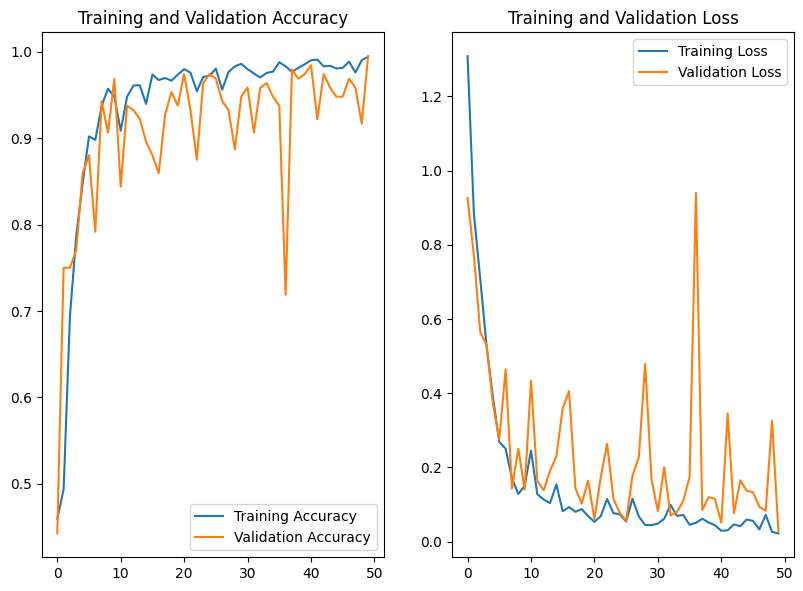

In [47]:
# plotting the comparison graphs
plt.figure(figsize = (15,15))

# Accuracy Table
plt.subplot(2,3,1)
plt.plot(range(EPOCHS),train_acc,label='Training Accuracy')
plt.plot(range(EPOCHS),val_acc,label = 'Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Loss Table
plt.subplot(2,3,2)
plt.plot(range(EPOCHS),train_loss,label='Training Loss')
plt.plot(range(EPOCHS),val_loss,label = 'Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 805ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 642ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 672ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 607ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 682ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 567ms/step


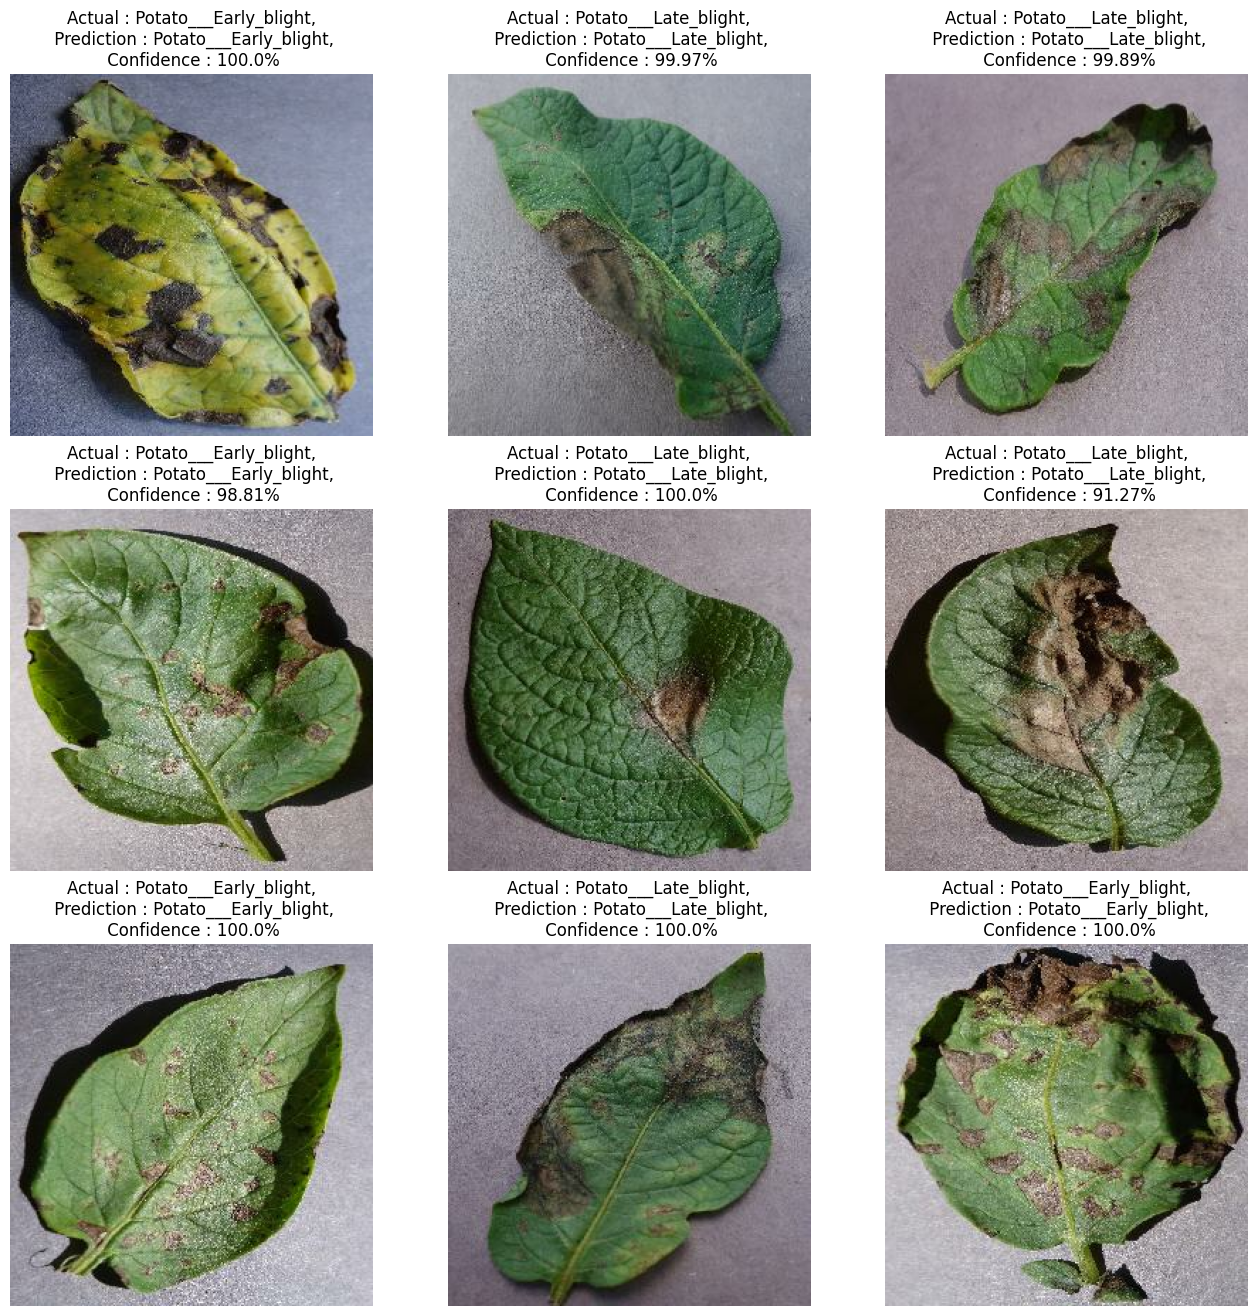

In [48]:
# plotting batch of test images with its actual label, predicted label and confidence
plt.figure(figsize = (16,16))
for batch_image, batch_label in test_pc.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        image = batch_image[i].numpy().astype('uint8')
        label = class_names[batch_label[i]]
    
        plt.imshow(image)
    
        batch_prediction = model.predict(batch_image)
        predicted_class = class_names[np.argmax(batch_prediction[i])]
        confidence = round(np.max(batch_prediction[i]) * 100, 2)
        
        plt.title(f'Actual : {label},\n Prediction : {predicted_class},\n Confidence : {confidence}%')
    
        plt.axis('off')

In [54]:
model.save('model.h5')

FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = 'model.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)